## Customer Segmentation
### K Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer

# Import metrics module for performance evaluation
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import completeness_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import v_measure_score

from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import fowlkes_mallows_score


In [2]:
# Dsplay pipelines
from sklearn import set_config
set_config(display="diagram")

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [5]:
# Data Import
df = pd.read_csv('../../data/mall-customers.csv')
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

## Data Visualization

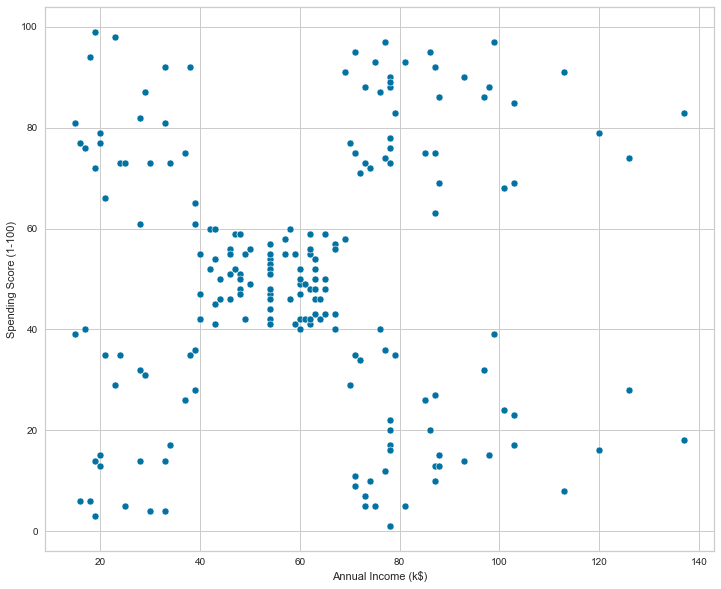

In [7]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=X, x='Annual Income (k$)',y='Spending Score (1-100)',palette=sns.color_palette("hls",10), legend="full")
plt.show()

## Find the number of clusters

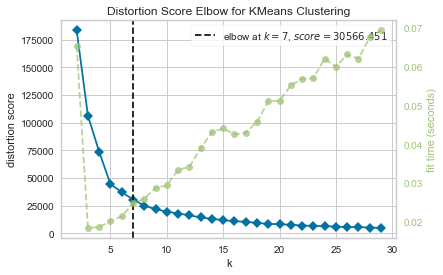

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
# Find the optimal number of clusters using the elbow method
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings=True)
visualizer.fit(X)
visualizer.show()


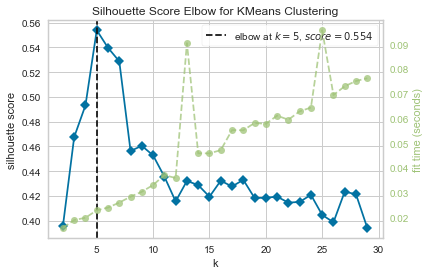

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [9]:
# Find the optimum number of clusters using the silhouette score
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(X)
visualizer.show()

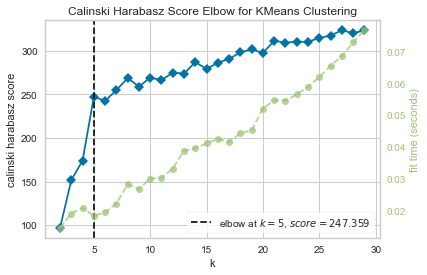

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [10]:
# Find the optimum number of clusters using the Calinski-Harabasz Index
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(X)
visualizer.show()

### From the above, The optimal number of clusters is 5.

In [11]:
# Define number of clusters
num_clusters = 5

## Create a clustering model using k-means clustering

In [12]:
# Create and fit the KMeans model
km = KMeans(n_clusters=num_clusters)
km.fit(X)

# Predict the target variable
y_pred=km.predict(X)

In [13]:
y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 1, 2, 4, 2, 1, 2, 1, 2,
       4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [14]:
df['cluster'] = y_pred
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


In [15]:
# Plot the cluster


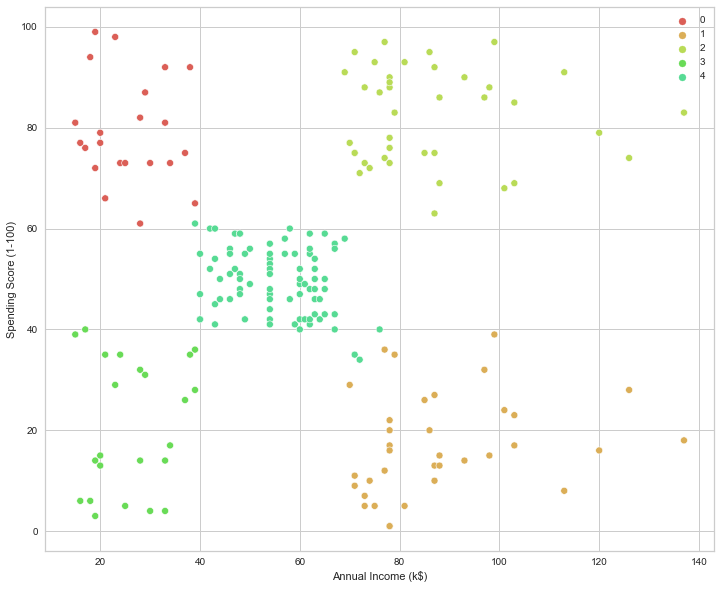

In [16]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=X, x='Annual Income (k$)',y='Spending Score (1-100)', hue=y_pred, palette=sns.color_palette("hls",10), legend="full")
plt.show()

In [22]:
# Calculate internal performance evaluation measures
print("Davies-Bouldin Index:", davies_bouldin_score(X, y_pred))
print("Silhouette Coefficient:", silhouette_score(X, y_pred))
print("Homogeneity score:", homogeneity_score(X['Spending Score (1-100)'], y_pred))
print("Completeness score:", completeness_score(X['Spending Score (1-100)'], y_pred))
print("V measure score:", v_measure_score(X['Spending Score (1-100)'], y_pred))

Davies-Bouldin Index: 0.5725628995597086
Silhouette Coefficient: 0.553931997444648
Homogeneity score: 0.29846090164567135
Completeness score: 0.8561571748059965
V measure score: 0.4426215864007475


In [25]:
# Calculate External performance evaluation measures
print("Adjusted Rand Score:", adjusted_rand_score(X['Spending Score (1-100)'], y_pred))
#print("Jaccard Score:", jaccard_score(X['Spending Score (1-100)'], y_pred))
#print("F-Measure(F1-Score):", f1_score(X['Spending Score (1-100)'], y_pred))
print("Fowlkes Mallows Score:", fowlkes_mallows_score(X['Spending Score (1-100)'], y_pred))

Adjusted Rand Score: 0.04935315215160662
Fowlkes Mallows Score: 0.1716755383044632
